# Programa de Ciencia de Datos, Aprendizaje Automático


**Tarea #2**

Estudiantes:

   - *Ricardo Montero Wille*

   - *Esteban Pérez Navarro*
   
   
El dataset utilizado se puede encontrar en la siguiente dirección:
   
   https://data.world/fivethirtyeight/soccer-spi

**Tutorial para Jr Data Scientist**

En este libro se encuentran una serie de pasos desarrollados para orientar a un Jr Data Scientist a realizar el EDA de un determinado dataset. En este caso, usaremos los datos del Soccer Power Index de FiveThirtyEight. 

Este set de datos trata sobre predicciones de partidos de fútbol de múltiples ligas del mundo. Para ello, utiliza un índice conocido como Soccer Power Index (SPI), y trae información de partidos que han ocurrido desde 2016 hasta otros que van a ocurrir en 2022. Algunos atributos son los goles anotados realmente, los goles predichos, la importancia que tiene el partido para el equipo, entre otros. 

**Paso 1**

El primer paso consiste en importar las librerías pandas y numpy para la importación, manejo y limpieza de datos, 
mientras que seaborn y matplotlib se utilizan para graficar los datos.

Adicionalmente, se utiliza el último comando para que el código ignore las advertencias que se pueden generar. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

**Paso 2**

El siguiente paso consiste en leer el archivo y previsualizarlo. Para ello, cargamos el archivo a una variable y luego 
lo leemos con el comando pd.read_csv.

Finalmente, previsualizamos los 10 primeros registros, con el comando head.

In [2]:
archivo = "spi_matches.csv"
spi= pd.read_csv(archivo)
spi.head(10)

season        date  league_id                   league  \
0    2016  2016-07-09       7921  FA Women's Super League   
1    2016  2016-07-10       7921  FA Women's Super League   
2    2016  2016-07-10       7921  FA Women's Super League   
3    2016  2016-07-16       7921  FA Women's Super League   
4    2016  2016-07-17       7921  FA Women's Super League   
5    2016  2016-07-24       7921  FA Women's Super League   
6    2016  2016-07-24       7921  FA Women's Super League   
7    2016  2016-07-31       7921  FA Women's Super League   
8    2016  2016-07-31       7921  FA Women's Super League   
9    2016  2016-08-03       7921  FA Women's Super League   

                 team1                  team2   spi1   spi2   prob1   prob2  \
0      Liverpool Women                Reading  51.56  50.42  0.4389  0.2767   
1        Arsenal Women    Notts County Ladies  46.61  54.03  0.3572  0.3608   
2     Chelsea FC Women        Birmingham City  59.85  54.64  0.4799  0.2487   
3      Liverpool Women    Notts County Ladies  53.00  52.35  0.4289  0.2699   
4     Chelsea FC Women          Arsenal Women  59.43  60.99  0.4124  0.3157   
5              Reading        Birmingham City  50.75  55.03  0.3821  0.3200   
6  Notts County Ladies  Manchester City Women  48.13  60.15  0.3082  0.3888   
7              Reading    Notts County Ladies  50.62  52.63  0.4068  0.3033   
8        Arsenal Women        Liverpool Women  48.32  48.46  0.4350  0.3100   
9              Reading  Manchester City Women  50.41  63.20  0.3061  0.4198   

   ...  importance1  importance2  score1  score2  xg1  xg2  nsxg1  nsxg2  \
0  ...          NaN          NaN     2.0     0.0  NaN  NaN    NaN    NaN   
1  ...          NaN          NaN     2.0     0.0  NaN  NaN    NaN    NaN   
2  ...          NaN          NaN     1.0     1.0  NaN  NaN    NaN    NaN   
3  ...          NaN          NaN     0.0     0.0  NaN  NaN    NaN    NaN   
4  ...          NaN          NaN     1.0     2.0  NaN  NaN    NaN    NaN   
5  ...          NaN          NaN     1.0     1.0  NaN  NaN    NaN    NaN   
6  ...          NaN          NaN     1.0     5.0  NaN  NaN    NaN    NaN   
7  ...          NaN          NaN     1.0     1.0  NaN  NaN    NaN    NaN   
8  ...          NaN          NaN     1.0     2.0  NaN  NaN    NaN    NaN   
9  ...          NaN          NaN     1.0     2.0  NaN  NaN    NaN    NaN   

   adj_score1  adj_score2  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  
5         NaN         NaN  
6         NaN         NaN  
7         NaN         NaN  
8         NaN         NaN  
9         NaN         NaN  

[10 rows x 23 columns]

**Paso 3**

En este paso comenzamos con la limpieza de los datos. 

En primer lugar, se observa que los nombres de las columnas no son representativos de los datos, por ejemplo el xg1 o xg2.
Para lograrlo, se consulta el dataset y la metadata adjunta, con el fin de poder explicar cada variable. Luego, se almacenan estos nombres en una lista. 


In [3]:
column_names = ['Season', 'Date', 'League_ID','League','Team1', 'Team2', 'Soccer Power Index Team 1', 'Soccer Power Index Team 2', 'Team 1 Win Probability', 'Team 2 Win Probability',
               'Tie Probability', 'Team 1 Projected Score', 'Team 2 Projected Score', 'Team 1 Match Importance', 'Team 2 Match Importance', 'Team 1 Actual Score', 'Team 2 Actual Score',
                'Team 1 Shot Expected Goals','Team 2 Shot Expected Goals', 'Team 1 Non Shot Expected Goals', 'Team 2 Non Shot Expected Goals', 'Team 1 Adjusted Score', 'Team 2 Adjusted Score']

Continuando con el paso anterior, se vuelve a cargar el archivo pero diciéndole que utilice la lista que definimos 
anteriormente como nombre de columnas. 

In [4]:
spi = pd.read_csv(archivo, names = column_names)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,2,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Procedemos a visualizar los datos de nuevo

In [5]:
spi.head(10)

Season        Date  League_ID                   League  \
0  season        date  league_id                   league   
1    2016  2016-07-09       7921  FA Women's Super League   
2    2016  2016-07-10       7921  FA Women's Super League   
3    2016  2016-07-10       7921  FA Women's Super League   
4    2016  2016-07-16       7921  FA Women's Super League   
5    2016  2016-07-17       7921  FA Women's Super League   
6    2016  2016-07-24       7921  FA Women's Super League   
7    2016  2016-07-24       7921  FA Women's Super League   
8    2016  2016-07-31       7921  FA Women's Super League   
9    2016  2016-07-31       7921  FA Women's Super League   

                 Team1                  Team2 Soccer Power Index Team 1  \
0                team1                  team2                      spi1   
1      Liverpool Women                Reading                     51.56   
2        Arsenal Women    Notts County Ladies                     46.61   
3     Chelsea FC Women        Birmingham City                     59.85   
4      Liverpool Women    Notts County Ladies                      53.0   
5     Chelsea FC Women          Arsenal Women                     59.43   
6              Reading        Birmingham City                     50.75   
7  Notts County Ladies  Manchester City Women                     48.13   
8              Reading    Notts County Ladies                     50.62   
9        Arsenal Women        Liverpool Women                     48.32   

  Soccer Power Index Team 2 Team 1 Win Probability Team 2 Win Probability  \
0                      spi2                  prob1                  prob2   
1                     50.42                 0.4389                 0.2767   
2                     54.03                 0.3572                 0.3608   
3                     54.64                 0.4799                 0.2487   
4                     52.35                 0.4289                 0.2699   
5                     60.99                 0.4124                 0.3157   
6                     55.03                 0.3821                   0.32   
7                     60.15                 0.3082                 0.3888   
8                     52.63                 0.4068                 0.3033   
9                     48.46                  0.435                   0.31   

   ... Team 1 Match Importance Team 2 Match Importance Team 1 Actual Score  \
0  ...             importance1             importance2              score1   
1  ...                     NaN                     NaN                   2   
2  ...                     NaN                     NaN                   2   
3  ...                     NaN                     NaN                   1   
4  ...                     NaN                     NaN                   0   
5  ...                     NaN                     NaN                   1   
6  ...                     NaN                     NaN                   1   
7  ...                     NaN                     NaN                   1   
8  ...                     NaN                     NaN                   1   
9  ...                     NaN                     NaN                   1   

  Team 2 Actual Score Team 1 Shot Expected Goals Team 2 Shot Expected Goals  \
0              score2                        xg1                        xg2   
1                   0                        NaN                        NaN   
2                   0                        NaN                        NaN   
3                   1                        NaN                        NaN   
4                   0                        NaN                        NaN   
5                   2                        NaN                        NaN   
6                   1                        NaN                        NaN   
7                   5                        NaN                        NaN   
8                   1                        NaN                        NaN   
9       

Acá notamos que los nombres de las columnas se introdujeron correctamente, pero los nombres viejos se pusieron en la fila 1. 
Para corregir esto utilizamos el comando drop de los dataframes, indicándole que use el eje 0 (filas) y la fila 0 (la primera).

In [6]:
spi = spi.drop([0], axis=0)

Se procede a visualzizar las primeras 10 filas de nuevo para determinar si sí se eliminó correctamente. 

In [7]:
spi.head(10)

Season        Date League_ID                   League                Team1  \
1    2016  2016-07-09      7921  FA Women's Super League      Liverpool Women   
2    2016  2016-07-10      7921  FA Women's Super League        Arsenal Women   
3    2016  2016-07-10      7921  FA Women's Super League     Chelsea FC Women   
4    2016  2016-07-16      7921  FA Women's Super League      Liverpool Women   
5    2016  2016-07-17      7921  FA Women's Super League     Chelsea FC Women   
6    2016  2016-07-24      7921  FA Women's Super League              Reading   
7    2016  2016-07-24      7921  FA Women's Super League  Notts County Ladies   
8    2016  2016-07-31      7921  FA Women's Super League              Reading   
9    2016  2016-07-31      7921  FA Women's Super League        Arsenal Women   
10   2016  2016-08-03      7921  FA Women's Super League              Reading   

                    Team2 Soccer Power Index Team 1 Soccer Power Index Team 2  \
1                 Reading                     51.56                     50.42   
2     Notts County Ladies                     46.61                     54.03   
3         Birmingham City                     59.85                     54.64   
4     Notts County Ladies                      53.0                     52.35   
5           Arsenal Women                     59.43                     60.99   
6         Birmingham City                     50.75                     55.03   
7   Manchester City Women                     48.13                     60.15   
8     Notts County Ladies                     50.62                     52.63   
9         Liverpool Women                     48.32                     48.46   
10  Manchester City Women                     50.41                      63.2   

   Team 1 Win Probability Team 2 Win Probability  ... Team 1 Match Importance  \
1                  0.4389                 0.2767  ...                     NaN   
2                  0.3572                 0.3608  ...                     NaN   
3                  0.4799                 0.2487  ...                     NaN   
4                  0.4289                 0.2699  ...                     NaN   
5                  0.4124                 0.3157  ...                     NaN   
6                  0.3821                   0.32  ...                     NaN   
7                  0.3082                 0.3888  ...                     NaN   
8                  0.4068                 0.3033  ...                     NaN   
9                   0.435                   0.31  ...                     NaN   
10                 0.3061                 0.4198  ...                     NaN   

   Team 2 Match Importance Team 1 Actual Score Team 2 Actual Score  \
1                      NaN                   2                   0   
2                      NaN                   2                   0   
3                      NaN                   1                   1   
4                      NaN                   0                   0   
5                      NaN                   1                   2   
6                      NaN                   1                   1   
7                      NaN                   1                   5   
8                      NaN                   1                   1   
9                      NaN                   1                   2   
10                     NaN                   1                   2   

   Team 1 Shot Expected Goals Team 2 Shot Expected Goals  \
1                         NaN                        NaN   
2                         NaN                        NaN   
3                         NaN                        NaN   
4                         NaN                        NaN   
5                         NaN                        NaN   
6                         NaN                        NaN   
7                         NaN                        NaN   
8                         NaN                        NaN   
9               

**Paso 4**

El siguiente paso continúa siendo parte de la limpieza, para ello, usamos el comando dtypes para visualizar el tipo de datos 
de todas las columnas del dataset. 

In [8]:
spi.dtypes

Season                            object
Date                              object
League_ID                         object
League                            object
Team1                             object
Team2                             object
Soccer Power Index Team 1         object
Soccer Power Index Team 2         object
Team 1 Win Probability            object
Team 2 Win Probability            object
Tie Probability                   object
Team 1 Projected Score            object
Team 2 Projected Score            object
Team 1 Match Importance           object
Team 2 Match Importance           object
Team 1 Actual Score               object
Team 2 Actual Score               object
Team 1 Shot Expected Goals        object
Team 2 Shot Expected Goals        object
Team 1 Non Shot Expected Goals    object
Team 2 Non Shot Expected Goals    object
Team 1 Adjusted Score             object
Team 2 Adjusted Score             object
dtype: object

Se observa que todos los atributos del dataset se importaron con el tipo object. Esto no nos va a permitir hacer cálculos usando los valores numéricos, ni tampoco utilizar las fechas. 

Para corregir esto, usamos los comandos: 

* to_datetime: Para convertir a tipo fecha
* astype: Para convertir a tipo entero o flotante. 

In [9]:
spi['Date'] = pd.to_datetime(spi['Date'])
spi['Season'] = spi['Season'].astype(int)
spi['Soccer Power Index Team 1'] = spi['Soccer Power Index Team 1'].astype(float)
spi['Soccer Power Index Team 2'] = spi['Soccer Power Index Team 2'].astype(float)
spi['Team 1 Win Probability'] = spi['Team 1 Win Probability'].astype(float)
spi['Team 2 Win Probability'] = spi['Team 2 Win Probability'].astype(float)
spi['Tie Probability'] = spi['Tie Probability'].astype(float)
spi['Team 1 Projected Score'] = spi['Team 1 Projected Score'].astype(float)
spi['Team 2 Projected Score'] = spi['Team 2 Projected Score'].astype(float)
spi['Team 1 Match Importance'] = spi['Team 1 Match Importance'].astype(float)
spi['Team 2 Match Importance'] = spi['Team 2 Match Importance'].astype(float)
spi['Team 1 Actual Score'] = spi['Team 1 Actual Score'].astype(float)
spi['Team 2 Actual Score'] = spi['Team 2 Actual Score'].astype(float)
spi['Team 1 Shot Expected Goals'] = spi['Team 1 Shot Expected Goals'].astype(float)
spi['Team 2 Shot Expected Goals'] = spi['Team 2 Shot Expected Goals'].astype(float)
spi['Team 1 Non Shot Expected Goals'] = spi['Team 1 Non Shot Expected Goals'].astype(float)
spi['Team 2 Non Shot Expected Goals'] = spi['Team 2 Non Shot Expected Goals'].astype(float)
spi['Team 1 Adjusted Score'] = spi['Team 1 Adjusted Score'].astype(float)
spi['Team 2 Adjusted Score'] = spi['Team 2 Adjusted Score'].astype(float)

Procedemos a visualizar de nuevo los tipos de dato de los atributos para ver si la conversión se hizo correctamente. 

In [10]:
spi.dtypes

Season                                     int32
Date                              datetime64[ns]
League_ID                                 object
League                                    object
Team1                                     object
Team2                                     object
Soccer Power Index Team 1                float64
Soccer Power Index Team 2                float64
Team 1 Win Probability                   float64
Team 2 Win Probability                   float64
Tie Probability                          float64
Team 1 Projected Score                   float64
Team 2 Projected Score                   float64
Team 1 Match Importance                  float64
Team 2 Match Importance                  float64
Team 1 Actual Score                      float64
Team 2 Actual Score                      float64
Team 1 Shot Expected Goals               float64
Team 2 Shot Expected Goals               float64
Team 1 Non Shot Expected Goals           float64
Team 2 Non Shot Expe

Seguidamente calculamos la media de una de las columnas para determinar que el tipo de dato en efecto se convirtió a flotante. 

In [11]:
spi['Soccer Power Index Team 1'].mean()

44.10901931374221

**Paso 5**

El siguiente paso en la limpieza es trabajar los valores faltantes o nulos. Para ello, utilizamos el comando isna().sum(), 
el cual va a contar la cantidad de nulos que existen en cada una de las columnas

In [13]:
spi.isna().sum()

Season                                0
Date                                  0
League_ID                             0
League                                0
Team1                                 0
Team2                                 0
Soccer Power Index Team 1             0
Soccer Power Index Team 2             0
Team 1 Win Probability                0
Team 2 Win Probability                0
Tie Probability                       0
Team 1 Projected Score                0
Team 2 Projected Score                0
Team 1 Match Importance           12604
Team 2 Match Importance           12604
Team 1 Actual Score                7426
Team 2 Actual Score                7426
Team 1 Shot Expected Goals        29077
Team 2 Shot Expected Goals        29077
Team 1 Non Shot Expected Goals    29077
Team 2 Non Shot Expected Goals    29077
Team 1 Adjusted Score             29077
Team 2 Adjusted Score             29077
dtype: int64

Es importante destacar que, como se mencionó al inicio, el dataset contiene partidos que aún no han ocurrido,
lo cual ocasiona que hayan muchos faltantes de datos en algunas de las variables. Para solucionar esto y no rellenar datos futuros, 
creamos un filtro en los datos basado en el atributo de fecha, para que sea superior al 10 de octubre del presente año, y solamente 
contenga datos de partidos que ya han ocurrido.

Para lograr lo anterior, creamos una variable llamada last_week que almacena la fecha dicha del 10 de octubre de 2021. 
Luego, hacemos un filtro de tipo lista, que compara en cada registro del dataset si la fecha es menor a la definida, y 
regresa un true o false. Finalmente, usamos el comando loc para filtrar los datos del dataset original, solamente en donde la variable before_last_week sea true.

Además, se almacenan las fechas futuras en otra tabla para luego pegárselas al dataset sin los faltantes de fechas viejas.

In [22]:
last_week = "2021-10-03"
before_last_week = spi["Date"] <= last_week
after_last_week = spi["Date"] >= last_week

spi = spi.loc[before_last_week]

futureSpi = spi.loc[after_last_week]

futureSpi

Season       Date League_ID                                    League  \
47023    2021 2021-10-03      1947                         Japanese J League   
47024    2021 2021-10-03      1854                             Italy Serie A   
47025    2021 2021-10-03      1882                Turkish Turkcell Super Lig   
47026    2021 2021-10-03      2417                      Scottish Premiership   
47027    2021 2021-10-03      1866                      Russian Premier Liga   
...       ...        ...       ...                                       ...   
47133    2021 2021-10-03      2105                        Brasileiro Série A   
47134    2021 2021-10-03      1951                       Major League Soccer   
47135    2021 2021-10-03      1952  Mexican Primera Division Torneo Apertura   
47136    2021 2021-10-03      1951                       Major League Soccer   
47137    2021 2021-10-03      1952  Mexican Primera Division Torneo Apertura   

                     Team1                   Team2  Soccer Power Index Team 1  \
47023         Oita Trinita            Cerezo Osaka                      18.69   
47024              Bologna                   Lazio                      58.91   
47025     Yeni Malatyaspor               Hatayspor                      31.19   
47026             Aberdeen                  Celtic                      32.30   
47027               FC Ufa  Ural Sverdlovsk Oblast                      35.27   
...                    ...                     ...                        ...   
47133               Grêmio            Sport Recife                      52.64   
47134   Los Angeles Galaxy          Los Angeles FC                      37.66   
47135          Tigres UANL                  Necaxa                      56.57   
47136  Seattle Sounders FC         Colorado Rapids                      46.71   
47137              Tijuana               Cruz Azul                      40.43   

       Soccer Power Index Team 2  Team 1 Win Probability  \
47023                      34.10                  0.2493   
47024                      70.88                  0.2778   
47025                      44.97                  0.3033   
47026                      64.17                  0.1361   
47027                      33.43                  0.4281   
...                          ...                     ...   
47133                      38.74                  0.5786   
47134                      49.30                  0.3459   
47135                      43.06                  0.5374   
47136                      43.47                  0.4915   
47137                      55.01                  0.2804   

       Team 2 Win Probability  ...  Team 1 Match Importance  \
47023                  0.4875  ...                     18.2   
47024                  0.4937  ...                     16.9   
47025                  0.4297  ...                     41.9   
47026                  0.6579  ...                     17.8   
47027                  0.2742  ...                     51.3   
...                       ...  ...                      ...   
47133                  0.1377  ...                     42.4   
47134                  0.3996  ...                     37.4   
47135                  0.2049  ...                     11.6   
47136                  0.2196  ...                     16.0   
47137                  0.4435  ...                     10.2   

       Team 2 Match Importance  Team 1 Actual Score  Team 2 Actual Score  \
47023                      0.3                  1.0                  0.0   
47024                     42.2                  3.0                  0.0   
47025                     24.0                  0.0                  2.0   
47026                     46.9                  1.0                  2.0   
47027                     51.1                  0.0                  1.0   
...                        ...                  ...                  ...   
47133                     34.5                  1.0            

Volvemos a contar la cantidad de nulos en cada columna, para determinar si el filtro sí aportó a eliminar nulos de futuros partidos. 

In [16]:
spi.isna().sum()

Season                                0
Date                                  0
League_ID                             0
League                                0
Team1                                 0
Team2                                 0
Soccer Power Index Team 1             0
Soccer Power Index Team 2             0
Team 1 Win Probability                0
Team 2 Win Probability                0
Tie Probability                       0
Team 1 Projected Score                0
Team 2 Projected Score                0
Team 1 Match Importance            6146
Team 2 Match Importance            6146
Team 1 Actual Score                 583
Team 2 Actual Score                 583
Team 1 Shot Expected Goals        22231
Team 2 Shot Expected Goals        22231
Team 1 Non Shot Expected Goals    22231
Team 2 Non Shot Expected Goals    22231
Team 1 Adjusted Score             22231
Team 2 Adjusted Score             22231
dtype: int64

Lo anterior denota que sí funcionó el método de filtro de fecha. 

Seguidamente, se desea rellenar los datos faltantes que aún quedan en el dataset para fechas que ya pasaron, y que, por tanto, 
deberían tener los datos completos. 

Para ello, se propone rellenar los datos usando la media de cada atributo, segmentado por año, para hacer la diferenciación entre las diferentes épocas históricas que puede sufrir un equipo. 
Esto se realiza creando una tabla filtrada para cada año, para luego rellenar cada una de ellas con la mediana de cada atributo. 
 
Para lograrlo se almacena cada año en una variable llamada season, para luego usar de nuevo la función loc y filtrar, y finalmente calcular la mediana para reemplazar los NaNs, usando la función fillna.

Finalmente, se usa la función append para anexar todas las tablas sin los NaNs pasados juntas, así como la tabla que creamos anteriormente con las fechas futuras, y lo guardamos en la variable newspi.

In [23]:
season2016 = spi["Season"] == 2016
spi2016 = spi.loc[season2016]
spi2016.fillna(spi2016.median(),inplace = True)

season2017 = spi["Season"] == 2017
spi2017 = spi.loc[season2017]
spi2017.fillna(spi2017.median(),inplace = True)

season2018 = spi["Season"] == 2018
spi2018 = spi.loc[season2018]
spi2018.fillna(spi2018.median(),inplace = True)

season2019 = spi["Season"] == 2019
spi2019 = spi.loc[season2019]
spi2019.fillna(spi2019.median(),inplace = True)

season2020 = spi["Season"] == 2020
spi2020 = spi.loc[season2020]
spi2020.fillna(spi2020.median(),inplace = True)

season2021 = spi["Season"] == 2021
spi2021 = spi.loc[season2021]
spi2021.fillna(spi2021.median(),inplace = True)


newspi = spi2016.append([spi2017,spi2018,spi2019,spi2020,spi2021, futureSpi])
newspi

<ipython-input-23-9a6df664e9f5>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  spi2016.fillna(spi2016.median(),inplace = True)
<ipython-input-23-9a6df664e9f5>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  spi2017.fillna(spi2017.median(),inplace = True)
<ipython-input-23-9a6df664e9f5>:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  spi2018.fillna(spi2018.median(),inplace = True)
<ipython-input-23-9a6df664e9f5>:15: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  spi2019.fillna(spi2019.median(),inplace = True)
<ipython-input-23-9a6df664e9f5>:19: FutureWarning: DataFrame.mean and DataFrame.me

Season       Date League_ID                                    League  \
1        2016 2016-07-09      7921                   FA Women's Super League   
2        2016 2016-07-10      7921                   FA Women's Super League   
3        2016 2016-07-10      7921                   FA Women's Super League   
4        2016 2016-07-16      7921                   FA Women's Super League   
5        2016 2016-07-17      7921                   FA Women's Super League   
...       ...        ...       ...                                       ...   
47133    2021 2021-10-03      2105                        Brasileiro Série A   
47134    2021 2021-10-03      1951                       Major League Soccer   
47135    2021 2021-10-03      1952  Mexican Primera Division Torneo Apertura   
47136    2021 2021-10-03      1951                       Major League Soccer   
47137    2021 2021-10-03      1952  Mexican Primera Division Torneo Apertura   

                     Team1                Team2  Soccer Power Index Team 1  \
1          Liverpool Women              Reading                      51.56   
2            Arsenal Women  Notts County Ladies                      46.61   
3         Chelsea FC Women      Birmingham City                      59.85   
4          Liverpool Women  Notts County Ladies                      53.00   
5         Chelsea FC Women        Arsenal Women                      59.43   
...                    ...                  ...                        ...   
47133               Grêmio         Sport Recife                      52.64   
47134   Los Angeles Galaxy       Los Angeles FC                      37.66   
47135          Tigres UANL               Necaxa                      56.57   
47136  Seattle Sounders FC      Colorado Rapids                      46.71   
47137              Tijuana            Cruz Azul                      40.43   

       Soccer Power Index Team 2  Team 1 Win Probability  \
1                          50.42                  0.4389   
2                          54.03                  0.3572   
3                          54.64                  0.4799   
4                          52.35                  0.4289   
5                          60.99                  0.4124   
...                          ...                     ...   
47133                      38.74                  0.5786   
47134                      49.30                  0.3459   
47135                      43.06                  0.5374   
47136                      43.47                  0.4915   
47137                      55.01                  0.2804   

       Team 2 Win Probability  ...  Team 1 Match Importance  \
1                      0.2767  ...                    30.85   
2                      0.3608  ...                    30.85   
3                      0.2487  ...                    30.85   
4                      0.2699  ...                    30.85   
5                      0.3157  ...                    30.85   
...                       ...  ...                      ...   
47133                  0.1377  ...                    42.40   
47134                  0.3996  ...                    37.40   
47135                  0.2049  ...                    11.60   
47136                  0.2196  ...                    16.00   
47137                  0.4435  ...                    10.20   

       Team 2 Match Importance  Team 1 Actual Score  Team 2 Actual Score  \
1                         30.8                  2.0                  0.0   
2                         30.8                  2.0                  0.0   
3                         30.8                  1.0                  1.0   
4                         30.8                  0.0                  0.0   
5                         30.8                  1.0                  2.0   
...                        ...                  ...                  ...   
47133                     34.5                  1.0                  2.0   
47134                  

Procedemos a verificar que existan solamente los NaNs de las fechas futuras, de nuevo con el isna().sum()

In [24]:
newspi.isna().sum()

Season                             0
Date                               0
League_ID                          0
League                             0
Team1                              0
Team2                              0
Soccer Power Index Team 1          0
Soccer Power Index Team 2          0
Team 1 Win Probability             0
Team 2 Win Probability             0
Tie Probability                    0
Team 1 Projected Score             0
Team 2 Projected Score             0
Team 1 Match Importance            0
Team 2 Match Importance            0
Team 1 Actual Score                1
Team 2 Actual Score                1
Team 1 Shot Expected Goals        52
Team 2 Shot Expected Goals        52
Team 1 Non Shot Expected Goals    52
Team 2 Non Shot Expected Goals    52
Team 1 Adjusted Score             52
Team 2 Adjusted Score             52
dtype: int64

**Paso 6**

El siguiente paso consiste en visualizar algunos de los datos, para ver que sean correctos. 
Como el dataset es tan grande y contiene aproximadamente 50.000 registros, se realizan algunos filtros. 


En este primer caso, se genera un sub-dataset con los datos de la liga italiana Serie A, para visualizar el Soccer Power Index de sus diferentes equipos. 

In [25]:
SerieA = spi["League"] == "Italy Serie A"
spiSerieA = newspi.loc[SerieA]

Primero se usa el plt.figure de matplotlit para definir el tamaño de las dimensiones de la gráfica.
Luego, se almacena en la variable chart un scatter plot de seaborn, usando sns.catplot y definiendo las variables y la data por usar.

Cambiamos la orientación de las etiquetas para que se puedan visualizar de manera correcta con plt.xticks y la ponemos a 90 grados. 

Finalmente usamos plt.show para mostrar el gráfico creado.

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x360 with 0 Axes>

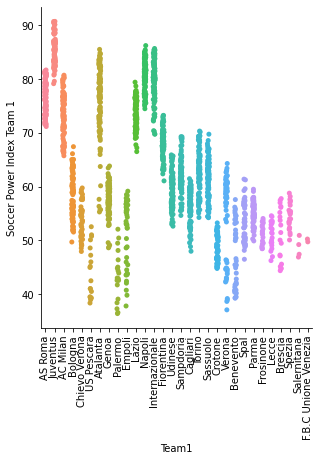

In [26]:
plt.figure(figsize=(10,5))

chart = sns.catplot(x="Team1", y="Soccer Power Index Team 1", data=spiSerieA)
plt.xticks(rotation=90)
plt.show

Se observa que la Juventus es el equipo que tiene los mayores puntos de SPI, seguido por el Napoli, Internazionale y Atalanta.

Seguidamente, visualizamos la cantidad de datos por temporada, con el fin de conocer si existe alguna que tenga más que los demás. Para ello, usamos sns.displot, el cual genera un histograma de frecuencias. 

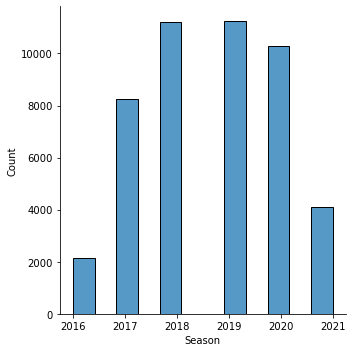

In [28]:
sns.displot(x = newspi['Season'], bins = 12)

Con el fin de comparar la relación entre los diferentes atributos utilizamos la función de gráfico de pares de seaborn, la cual realiza un gráfico de dispersión de cada variable contra las demás. 

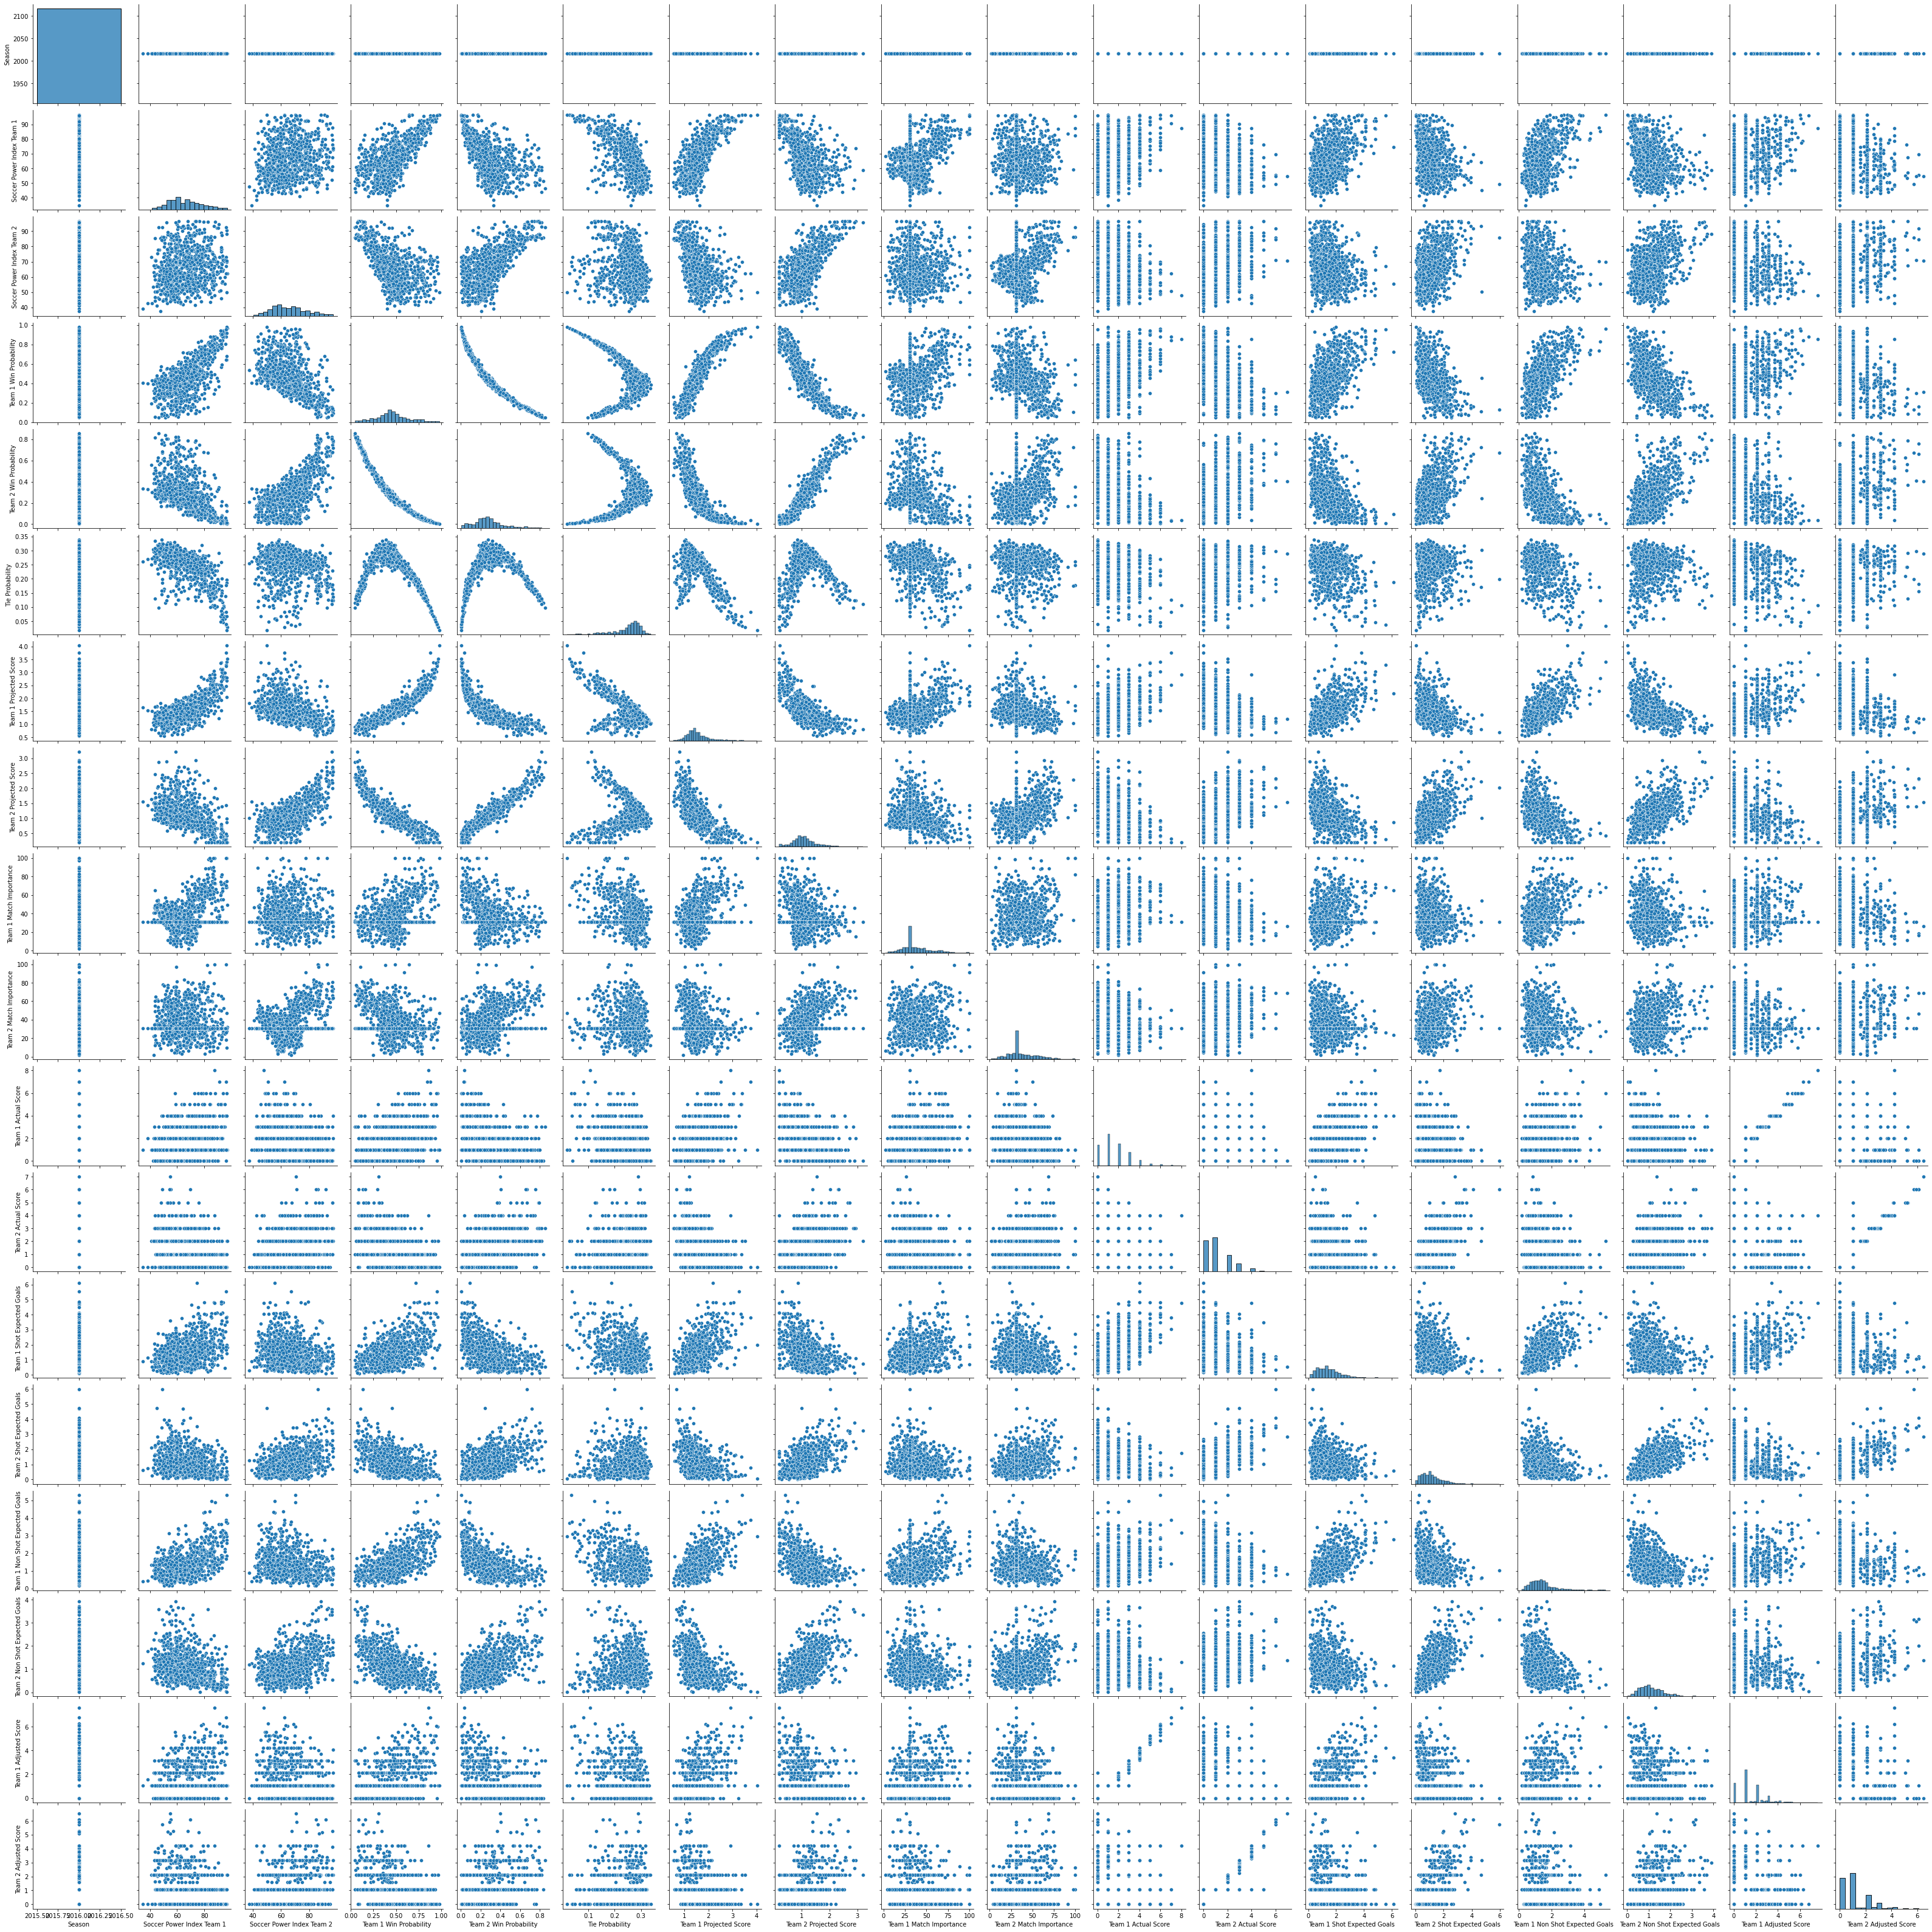

In [49]:
sns.pairplot(newspi.head(1000))

Se nota una relación interesante entre las variables "Team 1 Win Probability", "Team 2 Win Probability", "Tie Probability", "Team 1 Predicted Score" y "Team 2 Predicted Score". Esto tiene la explicación clara de que cuando el equipo 1 gana, el equipo 2 pierde, por lo tanto hay una correlación negativa. Por otro lado, Si el equipo 1 gana, es probable que tenga un predicted score alto, lo cual justifica esa correlación positiva. 

Con el fin de cuantificar esta correlación, se hace un mapa de calor entre las variables, utilizando la función heatmap de seaborn. 

<function matplotlib.pyplot.show(close=None, block=None)>

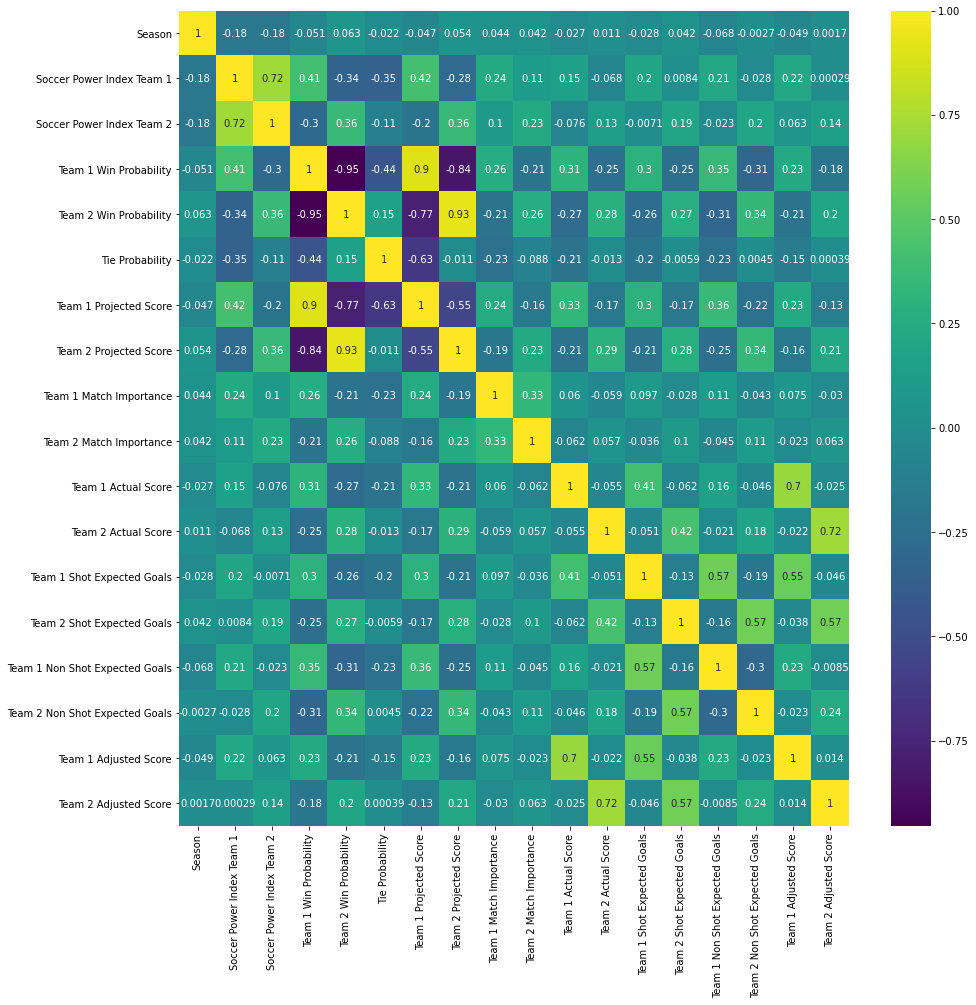

In [69]:
plt.figure(figsize=(15,15))

chart = sns.heatmap(newspi.corr(), annot = True, cmap = 'viridis')
plt.xticks(rotation=90)
plt.show

Este mapa de calor y sus coeficientes de correlación confirman la sospecha de los scatter plots, en donde se ve que "Team 1 Win Probability" se relaciona negativamente con un 0,95 con "Team 2 Win Probability", y a su vez con un 0,9 positivo con "Team 1 Projected Score".

Seguidamente, se realiza un boxplot para los Soccer Power Index, con el fin de determinar dónde se encuentran distribuidos los datos, usando la función boxplot de seaborn.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Soccer Power Index Team 1'>

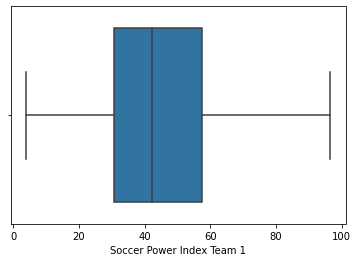

In [62]:
sns.boxplot(newspi['Soccer Power Index Team 1'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Soccer Power Index Team 2'>

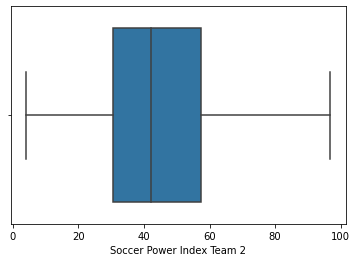

In [63]:
sns.boxplot(newspi['Soccer Power Index Team 2'])

Se denota que ambos SPI tienen una media que ronda el 44, con un comportamiento bastante similar en cuanto a su variabilidad también. 

Esto concluye el análisis exploratorio y limpieza de los datos de Soccer Power Index. 